## Task 1

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
N = 50000  # number of samples
mu, sigma = 0, np.sqrt(0.5)  # mean and standard deviation
X = np.random.normal(mu, sigma, N)
Y = np.random.normal(mu, sigma, N)

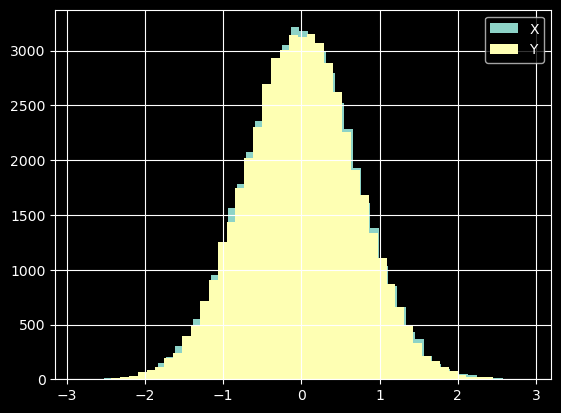

In [10]:
# Plots two histograms on the same figure
plt.hist(X, bins=50, alpha=1, label="X")
plt.hist(Y, bins=50, alpha=1, label="Y")
plt.legend(loc="upper right")
plt.grid()
plt.show()

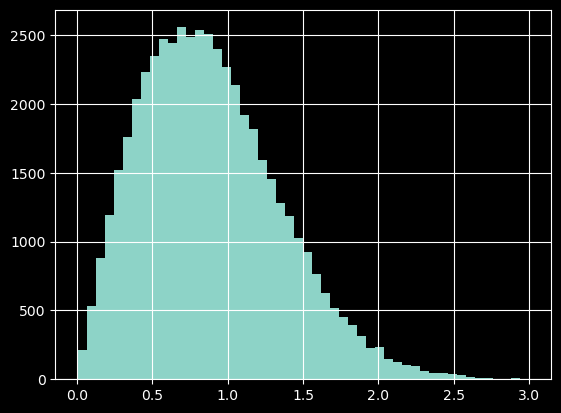

Expected value of E{g^2}: 0.9988754798764625


In [11]:
# Rayleigh random variable g such that g = |X + jY| and that the expected value of its square = 1
g = np.sqrt(X**2 + Y**2)

# Plots the histogram of g
plt.hist(g, bins=50, alpha=1)
plt.grid()
plt.show()

# Expected value of g^2
print("Expected value of E{g^2}:", np.mean(g**2))

In [12]:
# Square of magnitude of g^2
print("Expected value of E{g^2}^2:", np.mean(g**2) ** 2)

Expected value of E{g^2}^2: 0.9977522242984332


In [17]:
N = 50000  # number of samples
mu, sigma = 0, np.sqrt(0.5)  # mean and standard deviation
d_v = 2  # vertical distance
d_h = np.arange(20, 70, 5)  # horizontal distance
n = np.arange(3, 4.5, 0.5)  # path loss exponent
P_t = 1  # transmitted power

P_r0 = np.array([])
P_r0_iter = np.array([])
P_r1 = np.array([])
P_r1_iter = np.array([])
P_r2 = np.array([])
P_r2_iter = np.array([])

# Monte Carlo Simulations
iterations = 100  # number of iterations

for d_h_idx in d_h:
    for _ in range(iterations):
        X = np.random.normal(mu, sigma, N)
        Y = np.random.normal(mu, sigma, N)
        g = np.sqrt(X**2 + Y**2)
        mag_g = np.sqrt(np.mean(g**2))

        # Received power
        P_r0_iter = np.append(P_r0_iter, P_t * (d_h_idx**2 + d_v**2)**(-n[0] / 2) * mag_g**(-n[0]))
        P_r1_iter = np.append(P_r1_iter, P_t * (d_h_idx**2 + d_v**2)**(-n[1] / 2) * mag_g**(-n[1]))
        P_r2_iter = np.append(P_r2_iter, P_t * (d_h_idx**2 + d_v**2)**(-n[2] / 2) * mag_g**(-n[2]))
    
    # Average over iterations
    P_r0 = np.append(P_r0, np.mean(P_r0_iter))
    P_r1 = np.append(P_r1, np.mean(P_r1_iter))
    P_r2 = np.append(P_r2, np.mean(P_r2_iter))

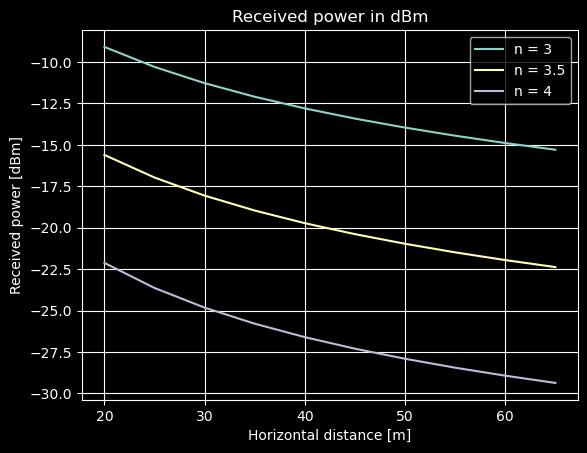

In [18]:
# Plot the received power in dBm
plt.plot(d_h, 10 * np.log10(P_r0 / 1e-3), label = "n = 3")
plt.plot(d_h, 10 * np.log10(P_r1 / 1e-3), label = "n = 3.5")
plt.plot(d_h, 10 * np.log10(P_r2 / 1e-3), label = "n = 4")
plt.xlabel("Horizontal distance [m]")
plt.ylabel("Received power [dBm]")
plt.title("Received power in dBm")
plt.legend()
plt.grid()
plt.show()

## Task 2

In [64]:
import numpy as np
import matplotlib.pyplot as plt

### Task 1-7

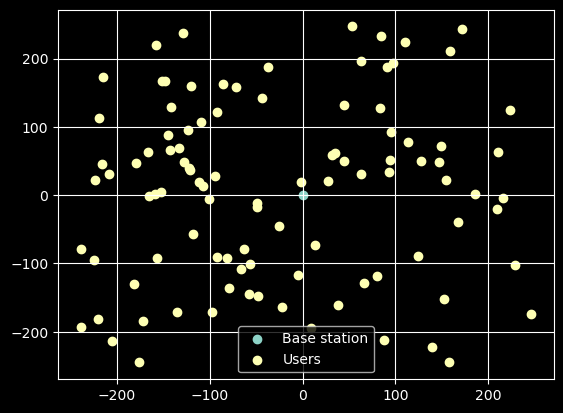

In [65]:
area = [-250, 250] # area of the simulation m^2
n_user = 100 # number of users
n_bs = 1 # number of base stations

# Create a network with base stration at the origin
bs = np.array([[0, 0]])
users = np.array([])

for _ in range(n_user):
    x = np.random.uniform(area[0], area[1])
    y = np.random.uniform(area[0], area[1])
    users = np.append(users, np.array([x, y]))

users = users.reshape(n_user, 2) # reshape the array to 100 x 2

# Plot the network
plt.scatter(bs[:, 0], bs[:, 1], label = "Base station")
plt.scatter(users[:, 0], users[:, 1], label = "Users")
plt.legend()
plt.grid()
plt.show()

In [66]:
# Calculate euclidean distance for each user
def euclidean_distance(x1, y1, x2, y2):
    distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance

distance_mat = np.array([])

for user in users:
    distance_mat = np.append(distance_mat, euclidean_distance(bs[0][0], bs[0][1], user[0], user[1]))

print("Distance matrix: ", distance_mat)

Distance matrix:  [122.79066636 191.81026583 144.20555041 181.8897786  197.27065134
 275.92987845 142.87167556 210.75491446 155.07158268 191.28082671
 297.80525477 220.76213705 290.83478751 301.95559583  34.39001792
 157.79106311 107.67612507 223.23770171 152.79025926 174.5231231
 158.63423548 262.7026799  270.43318031 185.09769538 171.74472465
 149.73085227 113.57535321 153.5276396  155.75729467 100.89694544
  51.51279422 216.17225009  51.4945577  128.70021298 184.31967109
  19.24667683 136.55501439 252.69352749 165.5904341   70.003958
 219.63601445 165.18214824 270.36658522 249.29168575 126.59305679
 165.51927135 170.25148458 130.7077214  177.38091059 251.20033344
 285.29675834 165.07648372 194.39006545 137.62571208 199.26295468
 132.55087425 156.29792434 208.98486908 264.31261259 185.75539501
 215.47973127  50.11006862 107.56789803  71.0108498  301.84545079
 152.9704117   98.86755898 251.23653402 148.72022915 225.48112684
 296.0542339  138.98616915 101.2267283  129.25040902 215.1069

In [67]:
# Calculate path loss for each user
path_loss_mat = np.array([])
n = 3.5 # path loss exponent

for distance in distance_mat:
    path_loss_mat = np.append(path_loss_mat, np.reciprocal(distance**n))

print("Path losses: ", path_loss_mat)

Path losses:  [4.87440099e-08 1.02317174e-08 2.77691817e-08 1.23217096e-08
 9.27430395e-09 2.86552661e-09 2.86872235e-08 7.35830887e-09
 2.15346210e-08 1.03311807e-08 2.19400065e-09 6.25552749e-09
 2.38362409e-09 2.09025472e-09 4.19263053e-06 2.02633662e-08
 7.71937317e-08 6.01607997e-09 2.26811548e-08 1.42401506e-08
 1.98889007e-08 3.40309630e-09 3.07461036e-09 1.15903476e-08
 1.50628822e-08 2.43450383e-08 6.40480134e-08 2.23021635e-08
 2.12046260e-08 9.69230194e-08 1.01928849e-06 6.73286954e-09
 1.02055247e-06 4.13497197e-08 1.17624854e-08 3.19708999e-05
 3.36064948e-08 3.89870690e-09 1.71149898e-08 3.48394199e-07
 6.36850596e-09 1.72635106e-08 3.07726179e-09 4.08811138e-09
 4.38092075e-08 1.71407579e-08 1.55303707e-08 3.91692853e-08
 1.34532100e-08 3.98042330e-09 2.54953554e-09 1.73022175e-08
 9.76429224e-09 3.27002802e-08 8.95379238e-09 3.72958846e-08
 2.09490225e-08 7.57875814e-09 3.33109788e-09 1.14473503e-08
 6.80890871e-09 1.12269686e-06 7.74659074e-08 3.31408402e-07
 2.0929255

In [68]:
N = 50000  # number of samples
mu, sigma = 0, np.sqrt(0.5)  # mean and standard deviation
P_t = 1 # transmitted power
P_r = np.array([])

# Rayleigh fading channel
X = np.random.normal(mu, sigma, N)
Y = np.random.normal(mu, sigma, N)
g = np.sqrt(X**2 + Y**2)
mag_g = np.sqrt(np.mean(g**2))

for path_loss in path_loss_mat:
    P_r = np.append(P_r, P_t * path_loss * mag_g**2) # received power

In [69]:
P_r_dBm = 10 * np.log10(P_r / 1e-3) # received power in dBm
N = -96 # dBm

snr_mat = np.array([])
rate_mat = np.array([])

for i in range(n_user):
    snr_mat = np.append(snr_mat, P_r_dBm[i] - N)
    rate_mat = np.append(rate_mat, np.log2(1 + 10**(snr_mat[i]/10) * 1e-3))

In [70]:
# Outage probability for threshold rate = 2
outage_prob = np.sum(rate_mat < 2) / n_user
print("Outage probability: ", outage_prob)

Outage probability:  0.0


### Monte Carlo Simulation

In [71]:
from tqdm import tqdm

area = [-250, 250] # area of the simulation m^2
n_user = 100 # number of users
n_bs = 1 # number of base stations
n = 3.5 # path loss exponent
Ns = 50000  # number of samples
mu, sigma = 0, np.sqrt(0.5)  # mean and standard deviation
P_t = 1  # transmitted power
N = -96 # 96 dBm
iterations = 100 # number of iterations
outage_prob_mat = np.array([])

for _ in tqdm(list(range(iterations))):
    # Create a network with base stration at the origin
    bs = np.array([[0, 0]])
    users = np.array([])

    for _ in range(n_user):
        x = np.random.uniform(area[0], area[1])
        y = np.random.uniform(area[0], area[1])
        users = np.append(users, np.array([x, y]))

    users = users.reshape(n_user, 2) # reshape the array to 100 x 2
    
    distance_mat = np.array([])
    path_loss_mat = np.array([])

    for user in users:
        distance_mat = np.append(distance_mat, euclidean_distance(bs[0][0], bs[0][1], user[0], user[1]))

    for distance in distance_mat:
        path_loss_mat = np.append(path_loss_mat, np.reciprocal(distance**n))

    P_r = np.array([])
    X = np.random.normal(mu, sigma, Ns)
    Y = np.random.normal(mu, sigma, Ns)
    g = np.sqrt(X**2 + Y**2)
    mag_g = np.sqrt(np.mean(g**2))

    for path_loss in path_loss_mat:
        P_r = np.append(P_r, P_t * path_loss * mag_g**2)

    P_r_dBm = 10 * np.log10(P_r) + 30 # received power in dBm

    snr_mat = np.array([])
    rate_mat = np.array([])

    for i in range(n_user):
        snr_mat = np.append(snr_mat, P_r_dBm[i] - N)
        rate_mat = np.append(rate_mat, np.log2(1 + 10**(snr_mat[i] / 10) * 1e-3))
    
    outage_prob_mat = np.append(outage_prob_mat, np.sum(rate_mat < 2) / n_user)

outage_prob = np.average(outage_prob_mat)

100%|██████████| 100/100 [00:01<00:00, 75.73it/s]


In [72]:
print("Outage probability: ", outage_prob)

Outage probability:  0.0


In [73]:
def total_outage_probability(rate_mat, threshold_rate):
    theta_op = np.prod(rate_mat < threshold_rate) / len(rate_mat)
    return theta_op

In [74]:
print("Total outage probability: ", total_outage_probability(rate_mat, 2))

Total outage probability:  0.0


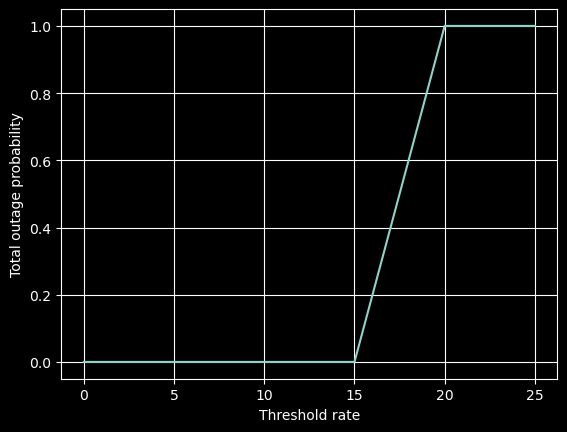

In [75]:
thresholds = np.arange(0, 30, 5)
theta_op_mat = np.array([])

for threshold in thresholds:
    theta_op_mat = np.append(theta_op_mat, total_outage_probability(rate_mat, threshold))

plt.plot(thresholds, theta_op_mat * 100)
plt.xlabel("Threshold rate")
plt.ylabel("Total outage probability")
plt.grid()
plt.show()

### Averaging Total Outage Probability Curve

In [76]:
from tqdm import tqdm

area = [-250, 250] # area of the simulation m^2
n_user = 100 # number of users
n_bs = 1 # number of base stations
n = 3.5 # path loss exponent
Ns = 50000  # number of samples
mu, sigma = 0, np.sqrt(0.5)  # mean and standard deviation
P_t = 1  # transmitted power
N = -96 # 96 dBm
iterations = 100 # number of iterations
outage_prob_mat = np.array([])
thresholds = np.arange(0, 30, 0.1)
theta_op_mat = np.array([])

for _ in tqdm(list(range(iterations))):
    # Create a network with base stration at the origin
    bs = np.array([[0, 0]])
    users = np.array([])

    for _ in range(n_user):
        x = np.random.uniform(area[0], area[1])
        y = np.random.uniform(area[0], area[1])
        users = np.append(users, np.array([x, y]))

    users = users.reshape(n_user, 2) # reshape the array to 100 x 2
    
    distance_mat = np.array([])
    path_loss_mat = np.array([])

    for user in users:
        distance_mat = np.append(distance_mat, euclidean_distance(bs[0][0], bs[0][1], user[0], user[1]))

    for distance in distance_mat:
        path_loss_mat = np.append(path_loss_mat, np.reciprocal(distance**n))

    P_r = np.array([])
    X = np.random.normal(mu, sigma, Ns)
    Y = np.random.normal(mu, sigma, Ns)
    g = np.sqrt(X**2 + Y**2)
    mag_g = np.sqrt(np.mean(g**2))

    for path_loss in path_loss_mat:
        P_r = np.append(P_r, P_t * path_loss * mag_g**2)

    P_r_dBm = 10 * np.log10(P_r) + 30 # received power in dBm

    snr_mat = np.array([])
    rate_mat = np.array([])

    for i in range(n_user):
        snr_mat = np.append(snr_mat, P_r_dBm[i] - N)
        rate_mat = np.append(rate_mat, np.log2(1 + 10**(snr_mat[i] / 10) * 1e-3))
    
    outage_prob_mat = np.append(outage_prob_mat, np.sum(rate_mat < 2) / n_user)

    for threshold in thresholds:
        theta_op_mat = np.append(theta_op_mat, total_outage_probability(rate_mat, threshold))

outage_prob = np.average(outage_prob_mat)
theta_op_mat = theta_op_mat.reshape(iterations, len(thresholds))

100%|██████████| 100/100 [00:02<00:00, 38.07it/s]


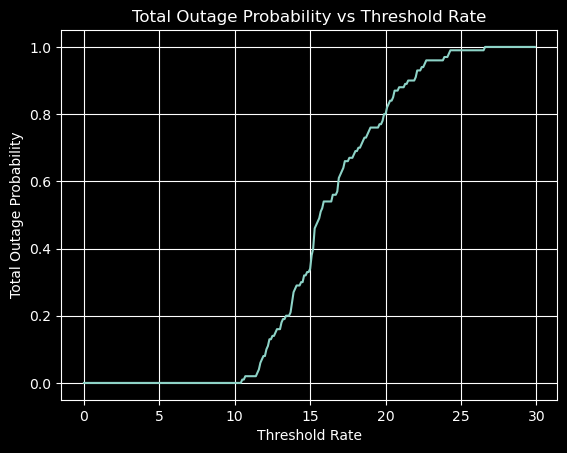

In [77]:
theta_op = np.mean(theta_op_mat, axis=0)

plt.plot(thresholds, theta_op * 100)
plt.xlabel("Threshold Rate")
plt.ylabel("Total Outage Probability")
plt.title("Total Outage Probability vs Threshold Rate")
plt.grid()
plt.show()